Few useful links before we start:


*   https://www.kaggle.com/harlfoxem/housesalesprediction
*   https://github.com/university-of-southampton-ai-society/Workshops-Material
*   https://pics.me.me/importtensorilowas-ti-you-know-im-something-of-a-machine-learning-37190481.png (a meme for a good evening)

# Steps in Machine Learning
## Exploring data 
Before we start experimenting with machine learning models we should understand the data that we work with. It is good to create some basic data visualization, or at least to look at some basic statistical properties about the dataset. It is quite important step as it can give some hints about which ML models will be effective to use with that data. We can also reach the conclusion that the data is just rubbish and it is impossible to create a good model based on it.

Some of the steps here might include:


*   Visualization of data distribution
*   Feature correlations
*   Deriving some basic statistical properties, like mean

We will use **seaborn** library and **pandas** for that part.

## Preprocessing the data
Different ML models requires different types and shapes of the input data. For example, Neural Networks will require vectors, or matrices and Linear Regression needs the data to be normalized.

You might also need to remove some weird values that you will find in columns (e.g. string value when a float value is required), or remove/replace missing values.

Generally, preprocessing is a step in machine learning to obtain the clean dataset that you can use to train the machine learning model.

## Feature Engineering
Some combination of features might be more useful than these features by themselves. For example, we have 3 features: "Age", "Weight", and "Height". With feature engineering we might add another features such as "Age" * "Weight", or "Weight" / "Height". They might occur to be more useful for the model than the single features.

## Training the model
The step where we get our hands dirty with different machine learning algorithms. Usually, we split up data into train dataset (for training the model) and the test dataset (to check if the model is good or how accurate the predictions are).

For data splitting we usually use a function from Sklearn: train_test_split()

*X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)*

In Scikit-Learn library there are two functions that are used for training the model and predicting results:


*   some_model.fit(X_train, y_train)
*   y_pred = some_model.pred(X_test)

This part is quite schematic and you will see it coming up many times.



## Measuring performance of the model
Once we get the predictions with *y_pred = some_model.pred(X_test)* we need to estimate how good the model is. There are various metrics to measure the model's accuracy.

For our purpose, we will use a mean squared error (MSE). The MSE will computed between the predicted values *y_pred* and test data *y_test* that we have put aside. Shortly speaking, the smaller the value of the MSE is, the better.

In [0]:
# We will need this library for preprocessing data (e.g. choosing features that we want to use)
import pandas as pd
# Library for data visualization - "better version" of Matplotlib
import seaborn as sns

In [0]:
# Getting data directly from the Github repo
url = "https://raw.githubusercontent.com/university-of-southampton-ai-society/Workshops-Material/master/Data/kc_house_data.csv"
# Data is now stored in a Pandas DataFrame
df = pd.read_csv(url, error_bad_lines=False) # Skip corrupted data

In [0]:
# Let's first have a look at a raw data!
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# Dropping features that are quite difficult to make them useful
# They might require to spend more time on the feature engineering part to extract more meaningful data from them
df = df.drop(columns=["zipcode", "lat", "long", "date", "yr_renovated", "id"])

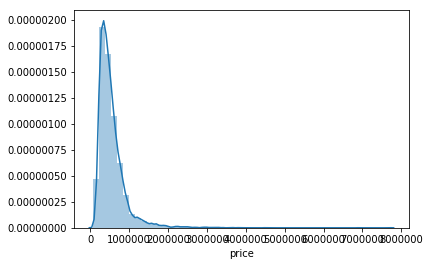

In [0]:
# Some basic visualization
# It might be a good idea to remove outliers (extreme/rare values in each feature)
# before the visualization part
sns.distplot(df["price"])

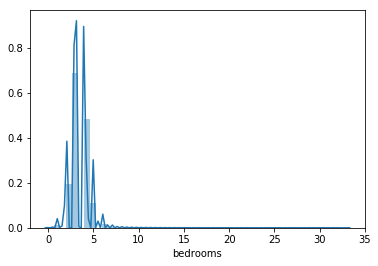

In [0]:
sns.distplot(df["bedrooms"])

In [0]:
# Getting some basic statistical description about data
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,6210.000000,871200.000000


In [0]:
### Preprocessing part
# Let's get the target variable
y = df["price"]
# Let's get dependent variables
X = df.drop(columns=["price"])

In [0]:
### Preprocessing part
# Splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [0]:
### Preprocessing part
# Standard Scaling - you might have to use for Linear Regression and SVR
# You don't need to use it for RandomForest
from sklearn.preprocessing import StandardScaler
# Define scalers
sc_x = StandardScaler()
sc_y = StandardScaler()
# Scale the train and test data
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.fit_transform(y_train.values.reshape(-1 ,1))

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

regr = RandomForestRegressor()
param_dist = {
    "n_estimators": [10, 50, 100, 250, 500],
    "min_samples_split": [2, 5, 10]
}
rand_search = RandomizedSearchCV(estimator=regr,
                             param_distributions=param_dist)

# Fitting the model
best_model =  rand_search.fit(X_train, y_train)

# Predict results
y_pred = best_model.predict(X_test)
# Comment the line below if you don't use Standard scaling
y_pred = sc_y.inverse_transform(y_pred) # Unscaling results

# Measure accuracy
from sklearn.metrics import mean_squared_error
acc = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {acc}")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

Mean Squared Error: 33266214808.954445


# Task For You
At the moment, the model is doing quite poorly. What about trying different regression models from the Scikit-Learn library (e.g. SVR, RandomForest) and modifying the model's parameters to improve the accuracy?

**Try choosing a model and parameters which achieves the lowest MSE score!**

You can submit you best MSE here: https://forms.gle/C82XFfoHBzy3ZghZ7

Useful Resources:

1.   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
2.   https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
